In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
df= pd.read_csv(r"C:./Desktop/dataset.csv")
df.head(7)



,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN
5,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-06,2.91,NaN,0.80,NaN,58,46,80.0,290.0,12.1,17.0,1.0,NaN,NaN
6,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-07,1.79,NaN,0.30,NaN,59,45,20.0,10.0,10.1,18.1,1.0,NaN,NaN


# # Replacing the values of PRCP column

In [96]:
df_new=df.drop(['PRCP'], axis = 1)

In [150]:
df_replace = df['PRCP'].tolist()
#df_replace

In [151]:
 for n, i in enumerate(df_replace):
...   if i == 0.0:
...      df_replace[n] = 0
 for n, i in enumerate(df_replace):
...   if i != 0:
...      df_replace[n] = 1     

In [152]:
#df_replace

In [100]:
df_replace=pd.DataFrame(df_replace)
df_replace

,0
0,0
1,0
2,0
3,1
4,1
...,...
1822,1
1823,1
1824,0
1825,0


In [101]:
df=df_new.join(df_replace)
df.columns = ['STATION', 'NAME','DATE',"AWND",'PGTM','TAVG',	'TMAX',	'TMIN',	'WDF2',	'WDF5',	'WSF2',	'WSF5',	'WT01',	'WT02',	'WT08','PRCP']

In [102]:

df


,STATION,NAME,DATE,AWND,PGTM,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08,PRCP
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0,0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN,0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN,0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN,1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,NaN,NaN,66,55,270.0,260.0,8.9,18.1,1.0,NaN,1.0,1
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,NaN,NaN,56,47,90.0,260.0,14.1,21.0,1.0,NaN,NaN,1
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,NaN,NaN,65,42,340.0,360.0,10.1,18.1,NaN,NaN,NaN,0
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,NaN,NaN,69,44,260.0,260.0,6.9,12.1,NaN,NaN,NaN,0


# # Visualising the imbalance

<AxesSubplot:>

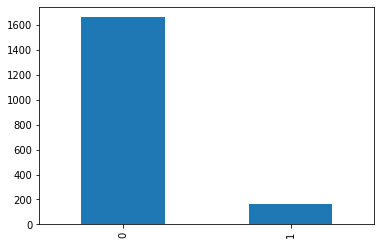

In [103]:
df['PRCP'].value_counts().plot(kind='bar')

In [104]:
df_class_0=df[df['PRCP']==0]
df_class_1=df[df['PRCP']==1]

In [105]:
count_class_0,count_class_1=df.PRCP.value_counts()
#df_class_1.sample(count_class_0,replace=True).shape
count_class_0,count_class_1

(1660, 167)

# # overbalance the minority

In [106]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_class_0, 
                                 replace=False,    
                                 n_samples=1000)
#Upsample minority class
df_minority_upsampled = resample(df_class_1, 
                                 replace=True,     
                                 n_samples=1000)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [107]:
df_majority_downsampled.shape

(1000, 16)

In [108]:
df_minority_upsampled.shape

(1000, 16)

# # Checking and droping the null values

In [109]:
df.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
TAVG       1827
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
PRCP          0
dtype: int64

In [110]:
df=df.drop(['DATE','PGTM','TAVG','WT01','WT02','WT08'], axis = 1)
df

,STATION,NAME,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,PRCP
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.46,64,43,10.0,30.0,8.1,11.0,0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.01,65,47,270.0,30.0,6.0,8.9,0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.67,62,44,150.0,150.0,10.1,14.1,0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.34,69,55,270.0,280.0,8.1,14.1,1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.46,59,49,140.0,140.0,10.1,16.1,1
...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.12,66,55,270.0,260.0,8.9,18.1,1
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",4.70,56,47,90.0,260.0,14.1,21.0,1
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.57,65,42,340.0,360.0,10.1,18.1,0
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.45,69,44,260.0,260.0,6.9,12.1,0


In [111]:
df.isnull().sum()

STATION     0
NAME        0
AWND        4
TMAX        0
TMIN        0
WDF2        5
WDF5       18
WSF2        4
WSF5       18
PRCP        0
dtype: int64

# # Converting the remaininng null values with mode


In [112]:
for column in ['AWND',	'TMAX',	'TMIN',	'WDF2',	'WDF5',	'WSF2',	'WSF5',	'PRCP']:
     df[column].fillna(df[column].mode()[0], inplace=True)

In [113]:
df.isnull().sum()

STATION    0
NAME       0
AWND       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
PRCP       0
dtype: int64

In [114]:
df

,STATION,NAME,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,PRCP
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.46,64,43,10.0,30.0,8.1,11.0,0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.01,65,47,270.0,30.0,6.0,8.9,0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.67,62,44,150.0,150.0,10.1,14.1,0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.34,69,55,270.0,280.0,8.1,14.1,1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2.46,59,49,140.0,140.0,10.1,16.1,1
...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.12,66,55,270.0,260.0,8.9,18.1,1
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",4.70,56,47,90.0,260.0,14.1,21.0,1
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1.57,65,42,340.0,360.0,10.1,18.1,0
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.45,69,44,260.0,260.0,6.9,12.1,0


# #Chi-Square test

In [115]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['STATION'] = label_encoder.fit_transform(df['STATION'])
df['NAME'] = label_encoder.fit_transform(df['NAME'])

In [116]:
df.head()

,STATION,NAME,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,PRCP
0,0,0,2.46,64,43,10.0,30.0,8.1,11.0,0
1,0,0,2.01,65,47,270.0,30.0,6.0,8.9,0
2,0,0,0.67,62,44,150.0,150.0,10.1,14.1,0
3,0,0,1.34,69,55,270.0,280.0,8.1,14.1,1
4,0,0,2.46,59,49,140.0,140.0,10.1,16.1,1


In [117]:
from sklearn.feature_selection import chi2

In [118]:
X = df.drop(['PRCP'],axis=1)
y = df['PRCP']

In [119]:
chi_scores = chi2(X,y)


In [120]:
chi_scores

(array([          nan,           nan,   79.05899558,  318.33894152,
          54.00341786, 2310.12947627, 1828.05882977,   32.19213439,
          83.73695329]),
 array([           nan,            nan, 6.02826182e-19, 3.33210470e-71,
        2.00141159e-13, 0.00000000e+00, 0.00000000e+00, 1.39654983e-08,
        5.65188246e-20]))

In [121]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

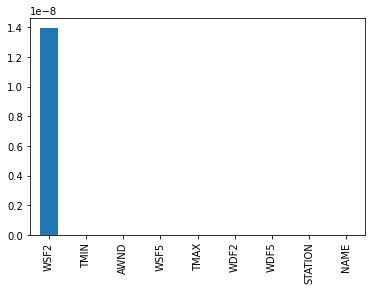

In [122]:
p_values.plot.bar()

In [123]:
df=df.drop(['STATION',"NAME",'WSF2'],axis=1)


# # Splitting data to train and test

In [124]:
from sklearn.model_selection import train_test_split
y = df.PRCP.values
X = df.drop('PRCP', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [125]:
X_test

,AWND,TMAX,TMIN,WDF2,WDF5,WSF5
791,3.13,59,51,100.0,100.0,14.1
1513,2.24,66,59,260.0,140.0,18.1
56,1.57,79,54,280.0,280.0,15.0
1785,0.45,75,51,270.0,270.0,12.1
522,1.12,73,64,260.0,270.0,13.0
...,...,...,...,...,...,...
1100,3.80,58,48,90.0,90.0,18.1
1292,1.57,85,65,260.0,270.0,13.0
926,1.34,87,70,270.0,270.0,13.0
374,2.24,64,55,100.0,100.0,17.0


# #  logistic regression

In [126]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [127]:
y_pred_logistic=model.predict(X_test)
y_pred_logistic

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#  accuracy

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_logistic)


0.9426229508196722

# Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_logistic)

print(cf_matrix)

[[328   8]
 [ 13  17]]


In [132]:
True_positive=17
True_negative=328
False_positive=8
False_negative=13

# precision

In [133]:
precision=True_positive/(True_positive+False_positive)
precision

0.68

# recall

In [134]:
recall=True_positive/(True_positive+False_negative)
recall

0.5666666666666667

# F1

In [135]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6181818181818183

In [136]:
# Adjust threshold for minimum false negative
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 

In [137]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 336]
 [  0  30]]
Threshold : 0.1
[[287  49]
 [  5  25]]
Threshold : 0.2
[[311  25]
 [  9  21]]
Threshold : 0.30000000000000004
[[320  16]
 [ 11  19]]
Threshold : 0.4
[[325  11]
 [ 12  18]]
Threshold : 0.5
[[328   8]
 [ 13  17]]
Threshold : 0.6000000000000001
[[331   5]
 [ 13  17]]
Threshold : 0.7000000000000001
[[333   3]
 [ 15  15]]
Threshold : 0.8
[[334   2]
 [ 21   9]]
Threshold : 0.9
[[336   0]
 [ 22   8]]


In [138]:
from sklearn.metrics import roc_curve, roc_auc_score

In [139]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [140]:
thresholds

array([1.99493949e+00, 9.94939488e-01, 9.11297411e-01, 8.31565758e-01,
       7.12216944e-01, 7.02791554e-01, 6.43644296e-01, 4.24046161e-01,
       4.09327895e-01, 4.04967449e-01, 3.97717652e-01, 2.37255604e-01,
       2.14526647e-01, 2.06164010e-01, 1.94665267e-01, 1.46576932e-01,
       1.44877319e-01, 1.36470838e-01, 1.35457176e-01, 1.21603503e-01,
       1.17504814e-01, 9.19549099e-02, 9.11523446e-02, 8.74362726e-02,
       8.59989971e-02, 3.21102340e-02, 3.14943403e-02, 2.85691384e-02,
       2.73643677e-02, 1.62385518e-02, 1.58871928e-02, 1.57683219e-06])

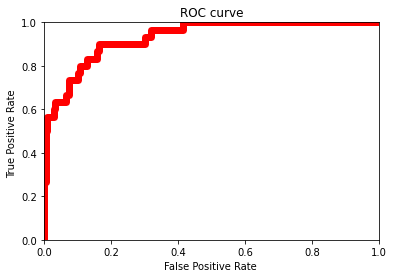

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot(fpr, tpr,color='red',lw=7)
plt.show()

# ROC_AUC score

In [148]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9324404761904762

# # decision tree classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_DTC = clf.predict(X_test)

In [144]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DTC))

Accuracy: 0.9234972677595629


# # SVM classifier

In [145]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

# # ROC_AUC score and visualization for different models


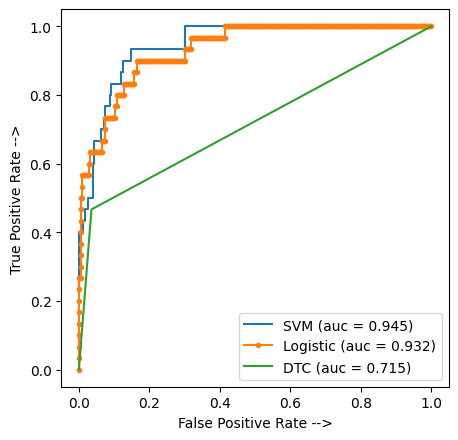

In [147]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, y_pred_DTC)
auc_DTC = auc(DTC_fpr, DTC_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(DTC_fpr, DTC_tpr, linestyle='-', label='DTC (auc = %0.3f)' % auc_DTC)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()